# Curso de Ciencia de los Datos

### Clasification

In [2]:
import pandas as pd
iris = pd.read_csv('./iris.csv')
print(iris.shape)

(150, 6)


In [3]:
iris.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [4]:
iris.drop('id',axis=1,inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [5]:
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

In [7]:
iris['species'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: species, dtype: int64

### Univariate Plot

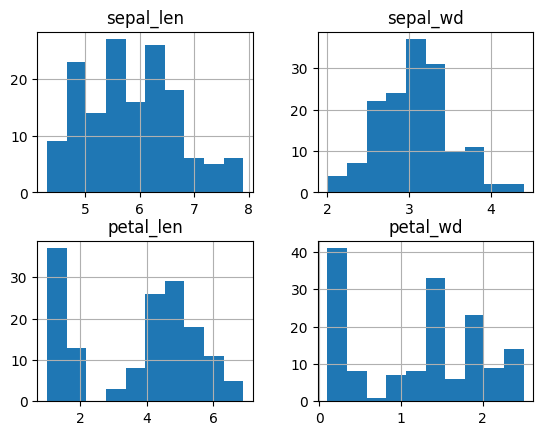

In [8]:
from matplotlib import pyplot as plt
iris.hist()
plt.show()

### Multivariate Plot

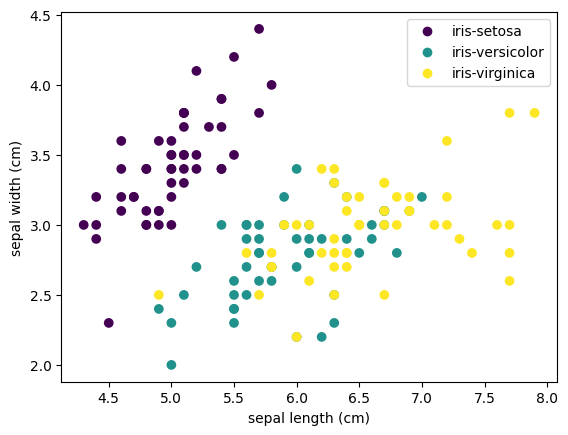

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('./iris.csv')

# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0,
'iris-versicolor': 1,
'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]
# scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()

### K nearest neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Data preparation

In [12]:
from sklearn.model_selection import train_test_split

X = iris[['petal_len', 'petal_wd']]
y = iris['species'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

iris-setosa        35
iris-virginica     35
iris-versicolor    35
Name: species, dtype: int64
iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: species, dtype: int64


Modeling

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

Probability Prediction

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12])

[[1.  0.  0. ]
 [0.  0.2 0.8]]


In [22]:
#Accuracy
## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((y_pred==y_test.values).sum())
print(y_test.size)
acc = (y_pred==y_test.values).sum()/y_test.size
print(f"Acurracy is {acc}")
score = knn.score(X_test,y_test)
print(f"Accuracy with score function is {score}")
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy with function accuracy_score is {acc_score}")

44
45
Acurracy is 0.9777777777777777
Accuracy with score function is 0.9777777777777777
Accuracy with function accuracy_score is 0.9777777777777777


Confusion Matrix

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


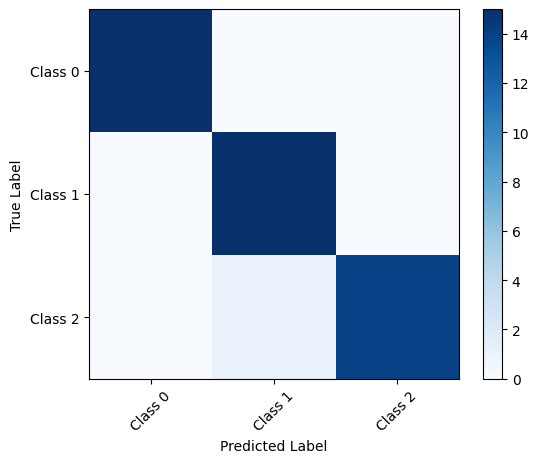

In [32]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

#visualizing confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

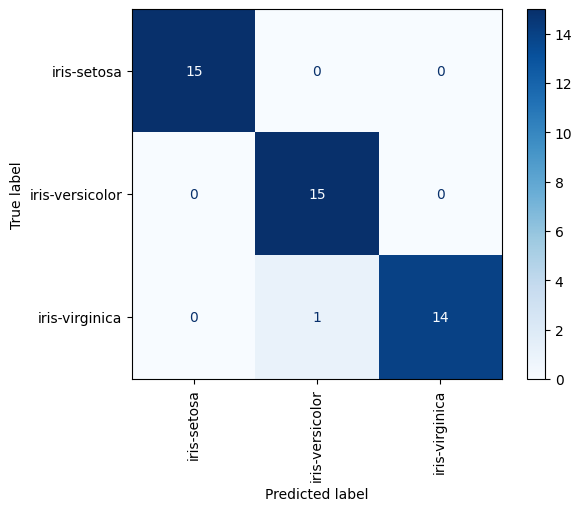

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class names
class_names = y.unique() #['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# Customize the display options
cmap = plt.cm.Blues
disp = disp.plot(cmap=cmap, xticks_rotation='vertical')

plt.show()

### K-fold Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score

# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
# then average them
print(cv_scores.mean())

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334


Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

print(f"The best param is {knn_gscv.best_params_}")
print(f"The best score is {knn_gscv.best_score_}")

The best param is {'n_neighbors': 4}
The best score is 0.9666666666666668


Building the final model

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('./iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

X_train = X_train.values

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, y))

0.9733333333333334


In [60]:
#Label Prediction with New Data
new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1, -1)
print(knn_final.predict(new_data))
print(knn_final.predict([[3.76, 1.2]]))

['iris-versicolor']
['iris-versicolor']


/home/angel/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/angel/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [61]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
print(knn_final.predict(new_data))

['iris-versicolor' 'iris-virginica' 'iris-setosa']


/home/angel/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [62]:
print(knn_final.predict_proba(new_data))

[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]


/home/angel/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
